In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import cv2
import tensorflow as tf
import os
import shutil
from PIL import Image

In [ ]:
from PIL import Image

def recortar_imagem(imagem, x, y, largura, altura):
    img = Image.open(imagem)
    recorte = img.crop((x, y, x+largura, y+altura))
    print(recorte.size)
    recorte.show()

# Exemplo de uso
recortar_imagem('./data/dataset/1a7a2ec67cefb1f11748edd2573291a8.png', 85, 915,100 , 100)


In [5]:
diretorio_dataset = './data/base/'
diretorio_dataset_recortado = "./data/dataset_recortado_binario_cnn/"
diretorio_dataset_marcado = "./data/tmp_img_preview/"
segmentationPath = "./data/segmentation_dataset/"
value_expand = 100

In [13]:
# Fitrando CSV

diretorio = '../data/base/'  

lista_arquivos = []

# Busca o nome das imagens da pasta e coloca em uma lista.
for nome_arquivo in os.listdir(diretorio):
    # Coloca na lista apenas se for uma imagem, e não uma pasta.
    if os.path.isfile(os.path.join(diretorio, nome_arquivo)):
        lista_arquivos.append(nome_arquivo)
        

# lendo csv        
df = pd.read_csv('../data/classifications.csv')

# Removendo colunas inuteis do csv
df_filtrado = df[df['image_filename'].isin(lista_arquivos)]  

df_filtrado.to_csv("../data/filter_classifications.csv", index=False)

### Recortando dataset

In [6]:
# obtendo cordenadas de cada arquivo

df = pd.read_csv("./data/classifications.csv")

# df = df[df["image_filename"] == "0a2a5a681410054941cc56f51eb8fbda.png"]

for each in df.iterrows():
  
  nome_img = each[1]['image_filename']
  nome_da_doenca = each[1]['bethesda_system']
  posi_x = each[1]['nucleus_x']
  posi_y = each[1]['nucleus_y']
  id_celular = each[1]['cell_id']  
  
  path_imagem_dataset_original = f'{diretorio_dataset}{nome_img}'

  print(path_imagem_dataset_original)
  
  # Onde ele vai ler cada imagem;
  img = cv2.imread(path_imagem_dataset_original)
  
  x1 = max(0, posi_x - value_expand)
  y1 = max(0, posi_y - value_expand)
  x2 = min(img.shape[1], posi_x + value_expand)
  y2 = min(img.shape[0], posi_y + value_expand)
  
  # Recortando a imagem;
  img_recortada = img[y1:y2,x1:x2]
  
  # Verifica se existe um folder no destino com o nome da doenca;
  if not os.path.exists(os.path.join(diretorio_dataset_recortado, nome_da_doenca)):
    os.mkdir(os.path.join(diretorio_dataset_recortado, nome_da_doenca))
    
  # Salva a imagem recortada no novo destino
  
  # print(len(img_recortada))
  
  
  
  if(len(img_recortada)!= 0):    
    try:
      cv2.imwrite(f'{diretorio_dataset_recortado}{nome_da_doenca}/' + f'{id_celular}.png', img_recortada)
    except:
      print(id_celular)
  # Limpar a variavel cv2
  cv2.destroyAllWindows()
  
  
  
  
  
  


./data/base/9ae8a4edde40219bad6303cebc672ee4.png
./data/base/9ae8a4edde40219bad6303cebc672ee4.png
./data/base/9ae8a4edde40219bad6303cebc672ee4.png
./data/base/9ae8a4edde40219bad6303cebc672ee4.png
./data/base/9ae8a4edde40219bad6303cebc672ee4.png
./data/base/9ae8a4edde40219bad6303cebc672ee4.png
./data/base/9ae8a4edde40219bad6303cebc672ee4.png
./data/base/9ae8a4edde40219bad6303cebc672ee4.png
./data/base/9ae8a4edde40219bad6303cebc672ee4.png
./data/base/9ae8a4edde40219bad6303cebc672ee4.png
./data/base/9ae8a4edde40219bad6303cebc672ee4.png
./data/base/9ae8a4edde40219bad6303cebc672ee4.png
./data/base/9ae8a4edde40219bad6303cebc672ee4.png
./data/base/9ae8a4edde40219bad6303cebc672ee4.png
./data/base/9ae8a4edde40219bad6303cebc672ee4.png
./data/base/9ae8a4edde40219bad6303cebc672ee4.png
./data/base/9ae8a4edde40219bad6303cebc672ee4.png
./data/base/9ae8a4edde40219bad6303cebc672ee4.png
./data/base/9ae8a4edde40219bad6303cebc672ee4.png
./data/base/9ae8a4edde40219bad6303cebc672ee4.png
./data/base/9ae8a4ed

### Recortando dataset memoria principal

In [28]:
# Determinando valor 100 caso nao for passado o valor de N

value_expand = 70
path_image = './data/dataset/363b6b00d925e5c52694b8f7b678c53b.png'


if not (isinstance(value_expand, int)):
  value_expand = 100

nome_img_selecionada = path_image.split("/")
nome_img_selecionada = nome_img_selecionada[(len(nome_img_selecionada)-1)]
# print(os.getcwd() + "/AI/data/classifications.csv")



#############################
#        TROCAR O PATH      #
#############################
df = pd.read_csv(os.getcwd() + "/data/classifications.csv")
df = df[df['image_filename'] == nome_img_selecionada]

# Leitura da imagem com padrão RGB para preservar cores para conversão para PIL.
img = cv2.cvtColor(cv2.imread(path_image), cv2.COLOR_BGR2RGB)

img_cut_list = []

for each in df.iterrows():
  
  nome_img = each[1]['image_filename']
  nome_da_doenca = each[1]['bethesda_system']
  posi_x = each[1]['nucleus_x']
  posi_y = each[1]['nucleus_y']  
  
  path_imagem_dataset_original = f'{diretorio_dataset}{nome_img}'

  # Verifica se a iamgem existe
  if(os.path.isfile(path_imagem_dataset_original)):
    # Onde ele vai ler cada imagem;
    # img = cv2.imread(path_imagem_dataset_original)
    
    x1 = posi_x - value_expand
    y1 = posi_y - value_expand
    x2 = posi_x + value_expand
    y2 = posi_y + value_expand
    
    # Recortando a imagem;
    img_recortada = img[y1:y2,x1:x2]
      
    
    if(len(img_recortada)!= 0):  
      img_cut_list.append(img_recortada.copy())
      # cv2.imwrite(f'{diretorio_dataset_recortado}{nome_da_doenca}/' + f'{nome_da_doenca}_{posi_x}_{posi_y}_{nome_img}', img_recortada)
    
    # Limpar a variavel cv2
    cv2.destroyAllWindows() 

# Converter cv2 para PIL -> a classe de zoom usa demonstração em PIL.
# img_toPIL = Image.fromarray(img_marcada)

In [3]:
df = pd.read_csv("./data/classifications.csv")

img = cv2.imread("./data/dataset/363b6b00d925e5c52694b8f7b678c53b.png")

for each in df.iterrows():
  
  nome_img = each[1]['image_filename']
  nome_da_doenca = each[1]['bethesda_system']
  posi_x = each[1]['nucleus_x']
  posi_y = each[1]['nucleus_y']  
  
  path_imagem_dataset_original = f'{diretorio_dataset}{nome_img}'

  # Verifica se a iamgem existe
  if(os.path.isfile(path_imagem_dataset_original)):
    # Onde ele vai ler cada imagem;
    # img = cv2.imread(path_imagem_dataset_original)
    
    x1 = posi_x - value_expand
    y1 = posi_y - value_expand
    x2 = posi_x + value_expand
    y2 = posi_y + value_expand
    
    # Recortando a imagem;
    img_recortada = img[y1:y2,x1:x2]
    
    # Verifica se existe um folder no destino com o nome da doenca;
    if not os.path.exists(os.path.join(diretorio_dataset_recortado, nome_da_doenca)):
      os.mkdir(os.path.join(diretorio_dataset_recortado, nome_da_doenca))
      
    # Salva a imagem recortada no novo destino
    
    # print(len(img_recortada))
    
    if(len(img_recortada)!= 0):    
      cv2.imwrite(f'{diretorio_dataset_recortado}{nome_da_doenca}/' + f'{nome_da_doenca}_{posi_x}_{posi_y}_{nome_img}', img_recortada)
    
    # Limpar a variavel cv2
    cv2.destroyAllWindows()
  

for each in df.iterrows():
  
  nome_img = each[1]['image_filename']
  nome_da_doenca = each[1]['bethesda_system']
  posi_x = each[1]['nucleus_x']
  posi_y = each[1]['nucleus_y']  
  
  path_imagem_dataset_original = f'{diretorio_dataset}{nome_img}'

  # Verifica se a iamgem existe
  if(os.path.isfile(path_imagem_dataset_original)):
    # Onde ele vai ler cada imagem;
    # img = cv2.imread(path_imagem_dataset_original)
    
    x1 = posi_x - value_expand
    y1 = posi_y - value_expand
    x2 = posi_x + value_expand
    y2 = posi_y + value_expand
    
    # Recortando a imagem;
    img_recortada = img[y1:y2,x1:x2]
    
    # Verifica se existe um folder no destino com o nome da doenca;
    if not os.path.exists(os.path.join(diretorio_dataset_recortado, nome_da_doenca)):
      os.mkdir(os.path.join(diretorio_dataset_recortado, nome_da_doenca))
      
    # Salva a imagem recortada no novo destino
    
    # print(len(img_recortada))
    
    if(len(img_recortada)!= 0):    
      cv2.imwrite(f'{diretorio_dataset_recortado}{nome_da_doenca}/' + f'{nome_da_doenca}_{posi_x}_{posi_y}_{nome_img}', img_recortada)
    
    # Limpar a variavel cv2
    cv2.destroyAllWindows()
  

### Marcando dataset


In [ ]:
# obtendo cordenadas de cada arquivo

df = pd.read_csv("./data/classifications.csv")

nome_img_selecionada = "363b6b00d925e5c52694b8f7b678c53b.png"

# Conferir se a imagem exste no path original
if(os.path.isfile(f'./data/dataset/{nome_img_selecionada}')):

  # shutil.copy(f"./data/dataset/{nome_img_selecionada}", f'./data/tmp_img_preview/{nome_img_selecionada}')
  
  # Pega o path da imagem no dataset original
  path_imagem_dataset_original = f'{diretorio_dataset}{nome_img_selecionada}'

  # Onde ele vai ler cada imagem;
  img = cv2.imread(path_imagem_dataset_original)
  
  # Iterando todas as linhas do CSV
  for each in df.iterrows():
    
    nome_img = each[1]['image_filename']
    nome_da_doenca = each[1]['bethesda_system']
    posi_x = each[1]['nucleus_x'] 
    posi_y = each[1]['nucleus_y']  
    img_id = each[1]['cell_id']
    
   
    # Quado a linha for igual ao nome da img
    if(nome_img == nome_img_selecionada):
      
      print(nome_img)
      print(posi_x)
      print(posi_y)
      print("------")
      
    
      
      
      x1 = posi_x - value_expand
      y1 = posi_y - value_expand
      x2 = posi_x + value_expand
      y2 = posi_y + value_expand

      # Fazendo o quadrado na imagem
      img_marcada = cv2.rectangle(img, (x1, y1), (x2, y2), (0, 100, 0), 2)
      
      # Escrevendo o indice na imagem
      img_marcada = cv2.putText(img_marcada, str(img_id), (posi_x-10, posi_y-55) , cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 100, 0), 2) 
     
      
     
  cv2.imshow('Imagem', img_marcada)

  # Aguarda até que uma tecla seja pressionada
  cv2.waitKey(0)

  # Fecha todas as janelas abertas
  cv2.destroyAllWindows()
  # cv2.imwrite(f'./data/tmp_img_preview/{nome_img_selecionada}', img_marcada)
    
    
    


### Segmentacao por região

In [39]:
def region_growing(image, seed, threshold):
    height, width  = image.shape
    visited = np.zeros((height, width), dtype=np.uint8)
    region = np.zeros_like(image)
    stack = []

    stack.append(seed)

    while stack:
        x, y = stack.pop()
        if not visited[x, y]:
            if np.linalg.norm(image[x, y] - image[seed]) < threshold:
                visited[x, y] = 1
                region[x, y] = image[x, y]
                for dx in range(-1, 2):
                    for dy in range(-1, 2):
                        if 0 <= x + dx < height and 0 <= y + dy < width:
                            stack.append((x + dx, y + dy))

    return region

### Segmentação com uma seed

In [41]:
def analisar_quadrado(imagem, coordenada_central, tamanho_quadrado):
    altura, largura = imagem.shape
    x, y = coordenada_central

    # Limitar as coordenadas para garantir que o quadrado esteja dentro da imagem
    x = max(tamanho_quadrado // 2, min(x, largura - 1 - tamanho_quadrado // 2))
    y = max(tamanho_quadrado // 2, min(y, altura - 1 - tamanho_quadrado // 2))

    # Definir as coordenadas do quadrado ao redor do ponto central
    quadrado_x = slice(x - tamanho_quadrado // 2, x + tamanho_quadrado // 2 + 1)
    quadrado_y = slice(y - tamanho_quadrado // 2, y + tamanho_quadrado // 2 + 1)
    
    
    # Extrair o quadrado da imagem
    quadrado = imagem[quadrado_y, quadrado_x]

    # Encontrar os valores mínimo e máximo no quadrado
    pixel_mais_escuro = np.min(quadrado)
    pixel_mais_claro = np.max(quadrado)

    return pixel_mais_escuro, pixel_mais_claro

In [64]:

# Carregando a imagem

image = cv2.imread('./data/dataset_recortado/Negative for intraepithelial lesion/5636.png')

# Jogando filtro Gaussiano
img_tratada = cv2.GaussianBlur(image, (5,5), 5)


# # Converte a imagem para o espaço de cor HSV
# imagem_hsv = cv2.cvtColor(img_tratada, cv2.COLOR_BGR2HSV)

# # Separa os canais HSV
# h, s, v = cv2.split(imagem_hsv)

# # Equaliza o canal de valor
# v_equalizado = cv2.equalizeHist(v)

# # Combina os canais novamente
# imagem_hsv_equalizada = cv2.merge([h, s, v_equalizado])

# # Converte a imagem de volta para o espaço de cor original
# imagem_equalizada = cv2.cvtColor(imagem_hsv_equalizada, cv2.COLOR_HSV2BGR)

# alpha = 1.5  # Fator de brilho (ajuste conforme necessário)
# beta = 40  # Valor de contraste (ajuste conforme necessário)
# img_tratada = cv2.convertScaleAbs(imagem_equalizada, alpha=alpha, beta=beta)


if image is not None:


    altura, largura, _ = img_tratada.shape
    
    seed = (altura//2, largura//2)  # Substitua as coordenadas da semente
    # Ajuste o valor do limite conforme necessário

    
    # posi = encontrar_pixel_mais_escuro(img_tratada, seed, tamanho_janela=10)
    
    imagem_cinza = cv2.cvtColor(img_tratada, cv2.COLOR_BGR2GRAY)
    px_escuro, px_claro = analisar_quadrado(imagem_cinza, seed, 50)
    print(f'O valor do px mais escuro é {px_escuro} e o do mais claro é {px_claro}')
    threshold = (int(px_claro) - int(px_escuro)) / 4
    print(f'O valor encontrado de threshold {threshold}')
    # Realizando a segmentação por crescimento de região
    
    
    segmented_region = region_growing(imagem_cinza, seed, threshold)

    # Exibindo a imagem original e a imagem segmentada
    # cv2.imshow('Cinza', imagem_cinza)
    # cv2.imshow('Original', image)
    # cv2.imshow('Blur', img_tratada)
    # cv2.imshow('Segmentada', segmented_region)
    # cv2.waitKey(0)
    # cv2.destroyAllWindows()
else:
    print("Erro ao carregar a imagem.")

O valor do px mais escuro é 42 e o do mais claro é 254
O valor encontrado de threshold 53.0


C:\Users\Viny\AppData\Local\Temp\ipykernel_44056\4242316428.py:12: RuntimeWarning: overflow encountered in scalar subtract
  if np.linalg.norm(image[x, y] - image[seed]) < threshold:


In [65]:

imagem_novo = segmented_region


# gray_original = cv2.cvtColor(imagem_novo, cv2.COLOR_BGR2GRAY)


# Detecte contornos na imagem em tons de cinza
contours, _ = cv2.findContours(imagem_novo, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

mask = np.zeros_like(imagem_novo)


# Desenhe os contornos na máscara
cv2.drawContours(mask, contours, -1, 255, thickness=cv2.FILLED)

# Aplique a máscara na outra imagem colorida
result_image = cv2.bitwise_and(image, image, mask=mask)



# cv2.imshow('Segmentação Final', final_segmentation)
cv2.imshow('Tons de Cinza', imagem_novo)
cv2.imshow('Mascara', mask)
cv2.imshow('Original', image)
cv2.imshow('Resultado', result_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Calculando a distancia euclediana entre os nucleos da imagem segmentada


In [6]:
import math
def calcular_distancia(x1, y1, x2, y2):
    distancia = math.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)
    return distancia

In [ ]:

df = pd.read_csv("./data/classifications.csv")
df = df[df['cell_id'] == 534]

nx = df["nucleus_x"]
ny = df["nucleus_x"]

img = result_image

gray_original_dois = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
contours, _ = cv2.findContours(gray_original_dois, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


# Calcule os momentos do contorno
if len(contours) > 0:
    # Suponha que o círculo branco é o primeiro contorno na lista (contorno externo)
    contour = contours[0]
    
    # Calcule os momentos do contorno
    M = cv2.moments(contour)
    
    # Calcule o centro do círculo branco
    cx = int(M["m10"] / M["m00"])
    cy = int(M["m01"] / M["m00"])
    
    # O centro (cx, cy) é o ponto central do círculo branco
    print(f'Centro do círculo branco: ({cx}, {cy})')
else:
    print('Nenhum contorno encontrado na máscara.')


altura, largura, _ = image.shape

branco = (255, 255, 255)  
verde =(0, 255, 0)

img[cy, cx] = branco   
img[largura//2, altura//2] = verde   


distancia_euclediana = calcular_distancia(altura//2, largura//2, cx, cy)
distancia_euclediana = abs(round(distancia_euclediana, 2))


print(f"Distancia Euclediana: {distancia_euclediana} ")

 
cv2.imshow('Tons de Cinza', gray_original_dois)
cv2.imshow('Contorno', contour)
cv2.imshow('Mostrando Centro', img)
cv2.waitKey(0)
cv2.destroyAllWindows()


### Usando Varias Seeds para Segmentar

In [ ]:
# Carregue a imagem
image = cv2.imread('./data/dataset_recortado/Negative for intraepithelial lesion/Negative for intraepithelial lesion_679_465_363b6b00d925e5c52694b8f7b678c53b.png')


altura, largura, _ = image.shape
    

img_tratada = cv2.GaussianBlur(image, (5,5), 5)

x = largura//2
y = altura//2

# Escolha as posições das sementes (exemplo: quatro sementes em diferentes partes da imagem)
seeds = [(x, y), (x+8, y-8), (x+4, y-4), (x+2, y-2)]
# seeds = [(y,x)]

# Defina o limiar de crescimento
threshold =70  # Ajuste conforme necessário

# Realize o crescimento por regiões para cada semente
segmented_regions = []

for seed in seeds:
    region = region_growing(img_tratada, seed, threshold)
    segmented_regions.append(region)

# Combine as regiões segmentadas para obter a segmentação final
final_segmentation = sum(segmented_regions)  # Você pode ajustar como desejar a combinação


# Exiba a segmentação final
cv2.imshow('Segmentação Final', final_segmentation)
cv2.imshow('Original', image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [59]:

imagem_novo = final_segmentation


gray_original = cv2.cvtColor(imagem_novo, cv2.COLOR_BGR2GRAY)


# Detecte contornos na imagem em tons de cinza
contours, _ = cv2.findContours(gray_original, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

mask = np.zeros_like(gray_original)

# Desenhe os contornos na máscara
cv2.drawContours(mask, contours, -1, 255, thickness=cv2.FILLED)

# Aplique a máscara na outra imagem colorida
result_image = cv2.bitwise_and(image, image, mask=mask)

# cv2.imshow('Segmentação Final', final_segmentation)
cv2.imshow('Tons de Cinza', gray_original)
cv2.imshow('Mascara', mask)
cv2.imshow('Original', image)
cv2.imshow('Resultado', result_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


### Histograma


In [16]:
# Carrega a imagem colorida
image = cv2.imread('./data/dataset_recortado/LSIL/LSIL_645_600_363b6b00d925e5c52694b8f7b678c53b.png')

# Converte a imagem para o espaço de cor HSV
imagem_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Separa os canais HSV
h, s, v = cv2.split(imagem_hsv)

# Equaliza o canal de valor
v_equalizado = cv2.equalizeHist(v)

# Combina os canais novamente
imagem_hsv_equalizada = cv2.merge([h, s, v_equalizado])

# Converte a imagem de volta para o espaço de cor original
imagem_equalizada = cv2.cvtColor(imagem_hsv_equalizada, cv2.COLOR_HSV2BGR)

# Ajustando a luminosidade (brilho) da imagem equalizada
alpha = 0.8  # Fator de brilho (ajuste conforme necessário)
beta = 5  # Valor de contraste (ajuste conforme necessário)
adjusted_image = cv2.convertScaleAbs(imagem_equalizada, alpha=alpha, beta=beta)

# Exibindo a imagem original, imagem equalizada e imagem ajustada
cv2.imshow('Original', image)
cv2.imshow('Equalizada', imagem_equalizada)
cv2.imshow('Ajustada', adjusted_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Testando com Gaussian, Equalizacao, Filtro de Realce e Mascara 

In [7]:
# Carrega a imagem colorida
image = cv2.imread('./data/dataset_recortado/LSIL/530.png')

img_tratada = cv2.GaussianBlur(image, (7,7), 7)

# Converte a imagem para o espaço de cor HSV
imagem_hsv = cv2.cvtColor(img_tratada, cv2.COLOR_BGR2HSV)

# Separa os canais HSV
h, s, v = cv2.split(imagem_hsv)

# Equaliza o canal de valor
v_equalizado = cv2.equalizeHist(v)

# Combina os canais novamente
imagem_hsv_equalizada = cv2.merge([h, s, v_equalizado])

# Converte a imagem de volta para o espaço de cor original
imagem_equalizada = cv2.cvtColor(imagem_hsv_equalizada, cv2.COLOR_HSV2BGR)

# Ajustando a luminosidade (brilho) da imagem equalizada
alpha = 9.0  # Fator de brilho (ajuste conforme necessário)
beta = 40  # Valor de contraste (ajuste conforme necessário)
adjusted_image = cv2.convertScaleAbs(imagem_equalizada, alpha=alpha, beta=beta)


# Exibindo a imagem original, imagem equalizada e imagem ajustada
cv2.imshow('Original', image)
cv2.imshow('Gaussian', img_tratada)
cv2.imshow('Equalizada', imagem_equalizada)
cv2.imshow('Ajustada', adjusted_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

Realizando a mascara invertida para Gaussian, Histograma, Filtro de Realce

In [4]:
imagem_novo = adjusted_image

gray_original = cv2.cvtColor(imagem_novo, cv2.COLOR_BGR2GRAY)

# Defina um valor de limiar para separar a região escura
threshold_value = 150  # Ajuste conforme necessário

# Crie uma máscara com base no limiar
_, dark_mask = cv2.threshold(gray_original, threshold_value, 255, cv2.THRESH_BINARY)

# Invertendo a mascara
dark_mask = cv2.bitwise_not(dark_mask)


# Aplique a máscara na outra imagem colorida
result_image = cv2.bitwise_and(image, image, mask=dark_mask)

# cv2.imshow('Segmentação Final', final_segmentation)
cv2.imshow('Tons de Cinza', gray_original)
cv2.imshow('Mascara', dark_mask)
cv2.imshow('Original', image)
cv2.imshow('Resultado', result_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Segmentação com Threshold

In [4]:

def segmentation(path):
  
  path = path.replace("\\", "/")  
  path_split = path.split('/')
  nome_img = path_split[len(path_split)-1]
  subpasta = path_split[len(path_split)-2]

  img = cv2.imread(path)
  img_tratada = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  
  # Aplica um desfoque Gausiando na imagem de matrix 5 por 5
  img_tratada = cv2.GaussianBlur(img_tratada, (5,5), 0)
  
  
  # Binarizando a imagem
  _, img_tratada = cv2.threshold(img_tratada, 0,255, cv2.THRESH_OTSU)
  
  # Operação de abertura para remover ruido
  kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (6,6))
  img_tratada = cv2.morphologyEx(img_tratada, cv2.MORPH_OPEN, kernel)
  
  # Verifica se o diretorio existe
  if not os.path.exists(f"./data/segmentation_dataset/{subpasta}"):
    os.makedirs(f"./data/segmentation_dataset/{subpasta}")
  
  # Salvando imagem
  cv2.imwrite(f"./data/segmentation_dataset/{subpasta}/{nome_img}", img_tratada)
  
# Lendo kd imagem dos folders
for pasta_raiz, sub_pastas, arquivos in os.walk(diretorio_dataset_recortado):
    for arquivo in arquivos:
        caminho_completo = os.path.join(pasta_raiz, arquivo)
        # segmentation("./data/dataset_recortado/Negative for intraepithelial lesion/Negative for intraepithelial lesion_348_207_363b6b00d925e5c52694b8f7b678c53b.png")
        segmentation(caminho_completo)
     

### Exibindo Celulas normais

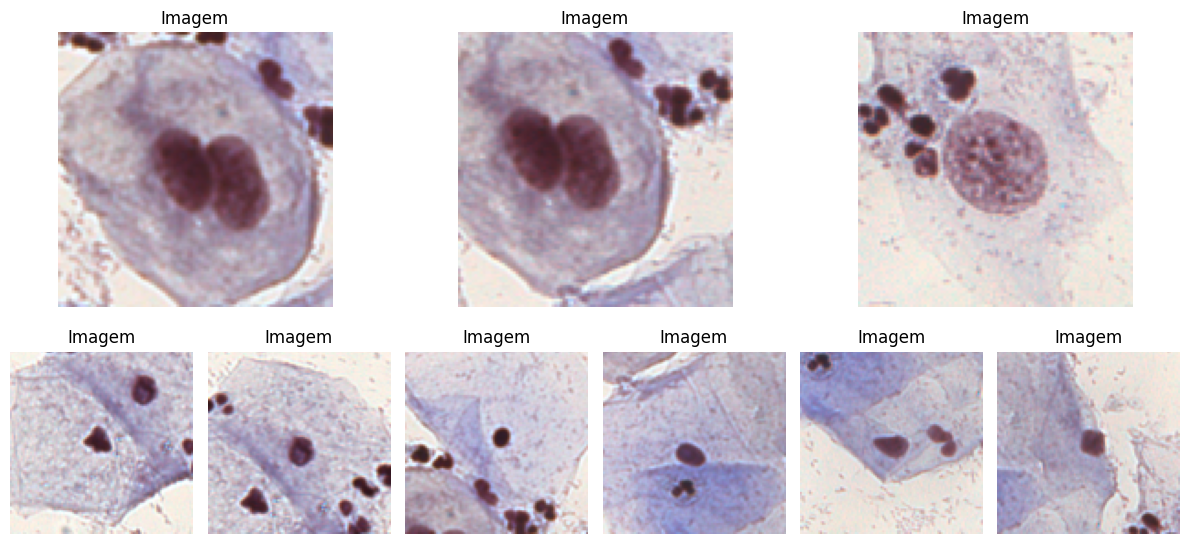

In [5]:
main_directory = './data/dataset_recortado/'

subfolders = [f for f in os.listdir(main_directory) if os.path.isdir(os.path.join(main_directory, f))]

plt.figure(figsize=(12, 6))

for i, subfolder in enumerate(subfolders):
    subfolder_path = os.path.join(main_directory, subfolder)
    image_files = [f for f in os.listdir(subfolder_path) if f.endswith(('.jpg', '.jpeg', '.png', '.bmp'))]

    for image_file in image_files:
        image_path = os.path.join(subfolder_path, image_file)
        image = plt.imread(image_path) 
        image_rgb = cv2.resize(image, (100, 100))

        image_rgb = cv2.cvtColor(image_rgb, cv2.COLOR_BGR2RGB)
        plt.subplot(len(subfolders), len(image_files), i * len(image_files) + image_files.index(image_file) + 1)
        plt.imshow(image_rgb)
        plt.axis('off')
        plt.title(f'Imagem')

plt.tight_layout()

plt.show()

### Exibindo celulas segmentadas

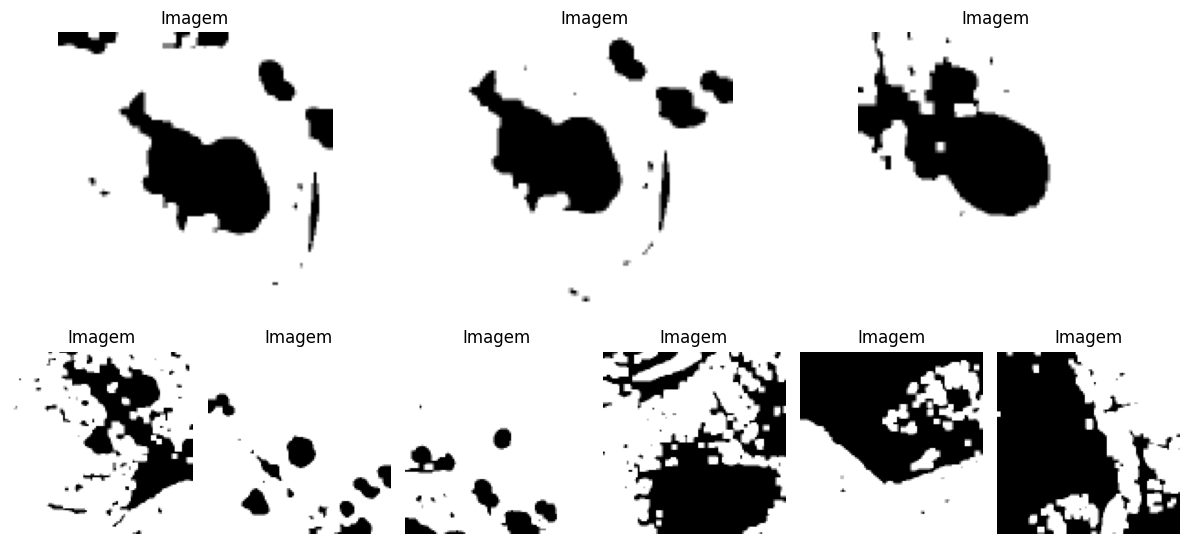

In [6]:
main_directory = './data/segmentation_dataset/'

subfolders = [f for f in os.listdir(main_directory) if os.path.isdir(os.path.join(main_directory, f))]

plt.figure(figsize=(12, 6))

for i, subfolder in enumerate(subfolders):
    subfolder_path = os.path.join(main_directory, subfolder)
    image_files = [f for f in os.listdir(subfolder_path) if f.endswith(('.jpg', '.jpeg', '.png', '.bmp'))]

    for image_file in image_files:
        image_path = os.path.join(subfolder_path, image_file)
        image = plt.imread(image_path) 
        image_rgb = cv2.resize(image, (100, 100))

        image_rgb = cv2.cvtColor(image_rgb, cv2.COLOR_BGR2RGB)
        plt.subplot(len(subfolders), len(image_files), i * len(image_files) + image_files.index(image_file) + 1)
        plt.imshow(image_rgb)
        plt.axis('off')
        plt.title(f'Imagem')

plt.tight_layout()

plt.show()
